# Colecting data from server

## Initialization header
The URL constant is the prefix to the api REST request. There are two commands:
* URLGET - Get a list of record IDs
* URLREG - Get the requested register

In [1]:
from json import loads  # utilizou o loads para pegar todas as coisas do jason que estão vindo em string
from urllib.request import urlopen  # bibliioteca para licar com localizadores universais

URL = "http://activufrj.nce.ufrj.br/api/"
URLGET = f"{URL}getlist"
URLREG = f"{URL}getsession?id="


## Activ interfacing class
Used to interface with __ActivUFRJ__. Calls the _REST_ api to request registers from database

In [2]:
%%writefile activreader.py
from json import loads  # utilizou o loads para pegar todas as coisas do jason que estão vindo em string
from urllib.request import urlopen  # bibliioteca para licar com localizadores universais

URL = "http://activufrj.nce.ufrj.br/api/"
URLGET = f"{URL}getlist"
URLREG = f"{URL}getsession?id="


class Activ:
    PARAMS = "ano1 idade1 sexo1 starttime endtime tipoescola escola".split()

    def __init__(self):  # underline em python quer dizer que é um nome reservado, um nome com significado predefinido
        self.jogadores = self.legends = None

    def one_player(self, play_url='90235c60e284c8ec5b8fc4107300f398'):
        urlreg1 = URLREG + play_url  # vai somar colocando no link
        aluno1 = urlopen(urlreg1)
        pyset = loads(aluno1.read())
        return pyset
        # print(len(pyset), )

    def get_jogadores(self, date="2018", start_count=(0, 100)):
        a, b = start_count
        dataset = urlopen(URLGET)  # por favor abra o pacote
        pyset = loads(dataset.read())  # vai transformar os strings do json
        registros = pyset['applist']  # registro principal que esta com o Mauricio
        registros = [numreg for data, numreg in registros if data and date in data]
        return registros[a:b]

    def file_demographics(self, date="2018", start_count=(0, 100), name="demo.csv"):
        a, b = start_count
        registros = self.get_jogadores(date)
        params = self.PARAMS
        lines = [[self.one_player(reg)["session"][col] for col in params] for reg in registros[a:b]]
        print("demo:", lines[0])
        import csv
        with open(name, 'w') as csvfile:
            spamwriter = csv.writer(csvfile, delimiter='\t',
                                    quotechar='|', quoting=csv.QUOTE_MINIMAL)
            [spamwriter.writerow(line) for line in lines]

    def file_game_demographics(self, date="2018", start_count=(0, 100), name="demo.csv"):
        a, b = start_count
        registros = self.get_jogadores(date)
        params = self.PARAMS
        lines = [[self.one_player(reg)["session"][col] for col in params] for reg in registros[a:b]]
        print("demo:", lines[0])
        import csv
        with open(name, 'w') as csvfile:
            spamwriter = csv.writer(csvfile, delimiter='\t',
                                    quotechar='|', quoting=csv.QUOTE_MINIMAL)
            [spamwriter.writerow(line) for line in lines]



Overwriting activreader.py


## Retrieving from the server
Call _activ_ classs methods to get information

In [3]:
from activreader import Activ

Activ().one_player()["session"]

{'sexo2': '',
 'idade1': 13,
 'idade2': 0,
 'ano1': 2,
 'ano2': 0,
 'escola': 'Rai Francisco Rodriques',
 'sexo1': 'M',
 'starttime': '2018-06-04 09:29:56.453464',
 'tipoescola': 'publica',
 'endtime': '2018-06-04 10:39:20.610199'}

In [4]:
from activreader import Activ

Activ().file_demographics(date="2012", start_count=(0, 400), name="demo.csv")

demo: [9, 17, 'M', '2012-05-31 12:47:13.201761', '', 'publica', 'ufrj']


In [5]:
Activ().get_jogadores(date="2012")[:108]

['ec82047f204d29db44ea4006e3f6bcc6',
 '4b0405bc1753caca3392cf5c20651ed8',
 '52665d660e51cb297ac12b3bfbacb9ce',
 'd0c26ee7d6b791dc5fd873a129029565',
 'd7a7722b7cd4c025b6aa32614d48e4c0',
 '2ce98568c622f89c860af2ec55a66d94',
 '491cbaceffb078c05663657651592780',
 '3ed2a1aa443be18d40d41789f5632d70',
 '41db413759d754b929dbe32fb72a8210',
 'f8d5030d3984d6e2e9ede659dbeefd4c',
 '04491d48c798ae847ed26a0dc7a70c0c',
 'efc6e216f49eb4b377d7217c454a11ce',
 '17557c2b605dd3b79e6eb1b1d4ab7188',
 '5beabb760345511870e4a63ae1b06d2b',
 '3f244bf4a21287d76a44bdc7fef0fde3',
 'e35a1a4a619baf439b3a42106ddc5605',
 '68c62cb3cf8c38239f6520190a33d359',
 '4ec9fac4ad806dbe9b99862f3fc636da',
 'f16577d48bd9f53305f5522645edc7b8',
 '60f13c6d0d3ceea591c4825a746583e3',
 '046cd2fdf202189c813332dc2f5c59f9',
 'bb64fc5409a79abba90db870327b2c23',
 'dd682f2154fab53b8990e9daaf55ba9c',
 '8db187ed5efda1d75ed8105f29466fba',
 '92298273dc890aa104b907ac9446aabb',
 '340cc961c10948fa401cbdd58fd2b199',
 'b193f89f6946eff2c4e7e542cc93bc1b',
 

## Accounting demographic statistics
### Gender ballance

Account for the sample size of male and female genders


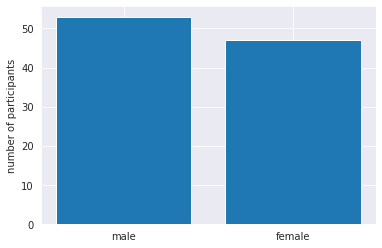

In [6]:
activ_reader = Activ()
player_sessions = [activ_reader.one_player(player)["session"]
                   for player in activ_reader.get_jogadores(date="2012")[:100]]
gender_tuples = [(1, 0) if session["sexo1"] == "M" else (0, 1) for session in player_sessions]
gender_count = [sum(gender) for gender in zip(*gender_tuples)]
from matplotlib import pyplot as plt
from datetime import datetime

plt.xticks((0, 1), "male female".split())
plt.ylabel("number of participants")
_ = plt.bar((0, 1), gender_count)

In [7]:
TFORMS = "%Y-%m-%d %H:%M:%S"


def calc_time(session):
    try:
        end = datetime.strptime(session["endtime"].split('.')[0], TFORMS)
        sta = datetime.strptime(session["starttime"].split('.')[0], TFORMS)
        dtime = end - sta
        return dtime.total_seconds() / 60.0
    except ValueError as ve:
        return 50


gender_time_tuples = [(calc_time(session), 0) if session["sexo1"] == "M" else (0, calc_time(session)) for session in
                      player_sessions]
he_time_count, she_time_count = zip(*gender_time_tuples)
he_time_count = [tc for tc in he_time_count if tc]
she_time_count = [tc for tc in she_time_count if tc]
she_avg = sum(she_time_count) / len(she_time_count)
he_avg = sum(he_time_count) / len(he_time_count)



### Time spent account

Accounts for the ammount of time played fo each gender

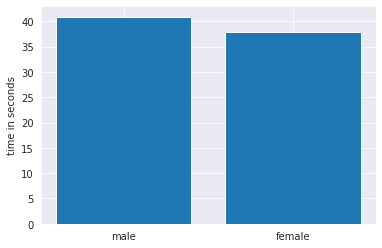

In [8]:
_ = plt.ylabel("time in seconds")
_ = plt.xticks((0, 1), "male female".split())
_ = plt.bar((0, 1), (he_avg, she_avg))